## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Libraries](#section2)<br>
3. [Corelation Matrix](#section3)<br>
4. [Label encoding of Target variable](#section4)<br>
5. [Pandas profiling](#section5)<br>
6. [Inferences about quality prediction metrices](#section6)<br>
7. [Splitting the data fro Training and Testing](#section7)<br>
8. [Normalizing the data to same scale](#section8)<br>
9. [Logistic regression Model](#section9)<br>
   [LR Model Classification report](#lr_class_report)<br>
10. [Model evaluation](#section10)<br>
11. [Decision Tree Model](#section11)<br>
12. [DT Model Classification report](#section12)<br>
13. [Random Forest model](#section13)<br>
    [RF Model Classification report](#RF_Class_model)<br>

<a id=section1> </a>
### 1. Problem Statement :

It is often very difficult to gauge the quality of wine by just looking at the Label of ingredients, however tasting is an other alternative. However in this Notebook, we are going to explore as how the quality of wine by checking the ingredients.

Description of the Dataset

This dataset provides information about wine's ingredient like citric acid, chlorides, sulfur dioxide, density, PH, alcohol etc.


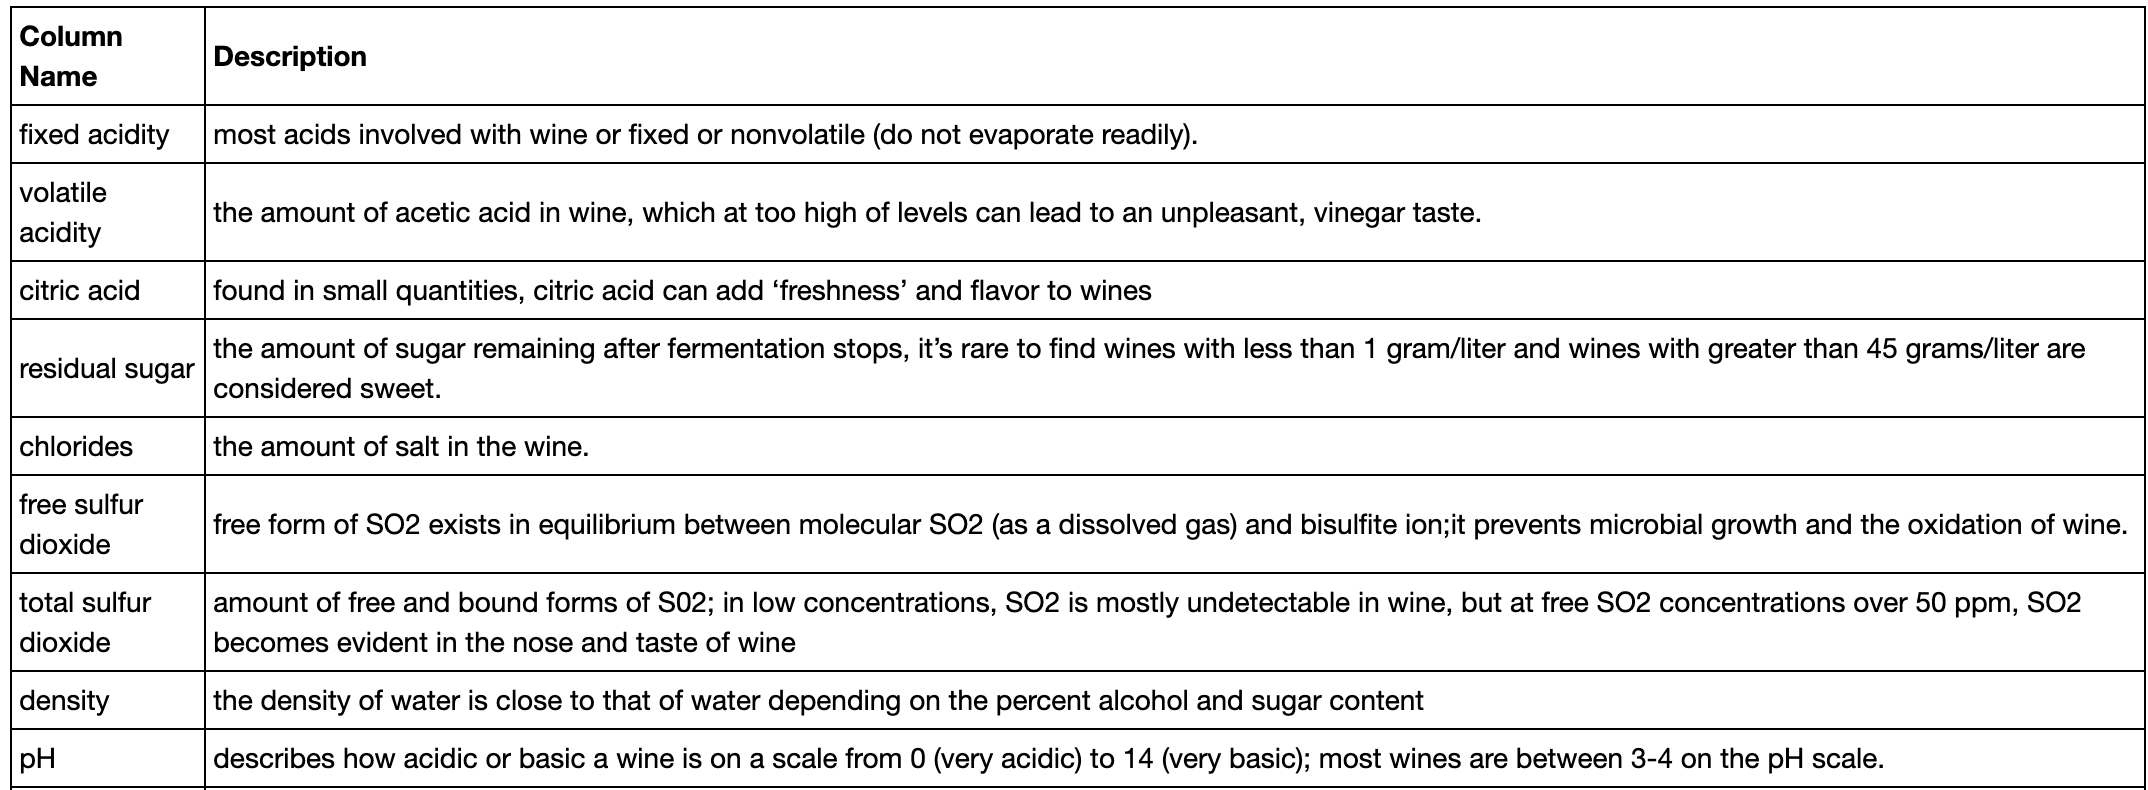

<a id=section2></a>
### 2. Importing Libraries

In [643]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [644]:
df_wine=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [645]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [726]:
df_wine_trial['quality'].value_counts()

0    4310
1    1008
Name: quality, dtype: int64

In [646]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [647]:
df_wine.shape

(6497, 12)

<a id=section3></a>
### 3. Corelation Matrix

### Its clear from the above stats, that there are no missing values in the dataset.

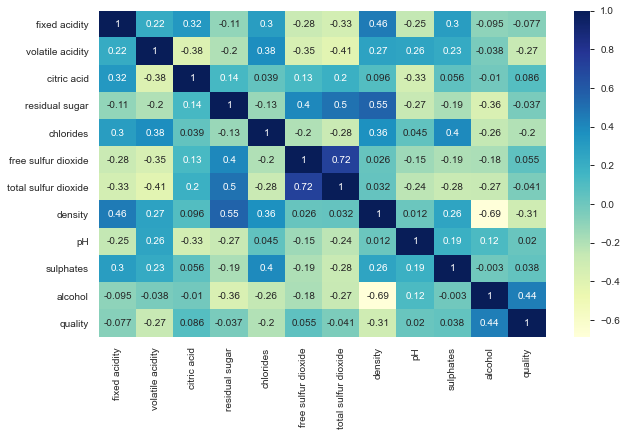

In [648]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_wine_corr = df_wine.corr()
sns.heatmap(df_wine_corr,annot=True,cmap='YlGnBu')

**Correlation between the fields :**

1. Total sulfur dioxide <--> Free sulfur dioxide are highly corelated (0.72)
2. Residual sugar <--> Density (0.55)
3. Residual sugar <--> Total sulfur dioxide (0.5)
4. Density <--> Fixed acidity (0.45)
5. residual sugar <--> free sulfur dioxide (0.4)
6. Chlorides <--> density (0.36)
7. Sulphates <--> density (0.26)

**However when we check the target quality variable corelation :**

- Quality <--> alcohol level are highly corelated
- Also seems like the quality of the wine doesn't rely upon the density


In [649]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Pandas profiling

In [650]:
#!pip install pandas-profiling

In [651]:
import pandas_profiling

In [652]:
df_wine_trial=df_wine.copy()

<a id=section4></a>
### 4. Label encoding of Target variable

### Let's try to convert the target variable to categorical form, so that we could use the classification methodologies and algorithms for the prediction

#### Hence we are using below to bifurcate the quality as Good and Bad based on the quality value, if the quality less than <6.0, then we are classifying it as "Bad", if the quality level is >6.0, then we categorize it as "Good"

In [653]:
df_wine.loc[df_wine['quality']<2]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

##### Since there are no records with quality level <2, we have used our range in bins below between (2.0 - 6.0)

#### Also, we have chosen 6.0, because to create a balanced dataset

In [654]:
df_wine['quality'].value_counts().sort_values

<bound method Series.sort_values of 6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64>

In [655]:
df_wine_trial['quality']=pd.cut(df_wine_trial['quality'],bins=(2.0,6.5,10.0),labels=['Bad','Good'])

In [656]:
df_wine_trial['quality']

0        Bad
1        Bad
2        Bad
3        Bad
4        Bad
        ... 
6492     Bad
6493     Bad
6494     Bad
6495    Good
6496     Bad
Name: quality, Length: 6497, dtype: category
Categories (2, object): [Bad < Good]

In [657]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label_quality = LabelEncoder()

In [658]:
type(df_wine_trial['quality'])

pandas.core.series.Series

In [710]:
df_wine_trial.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

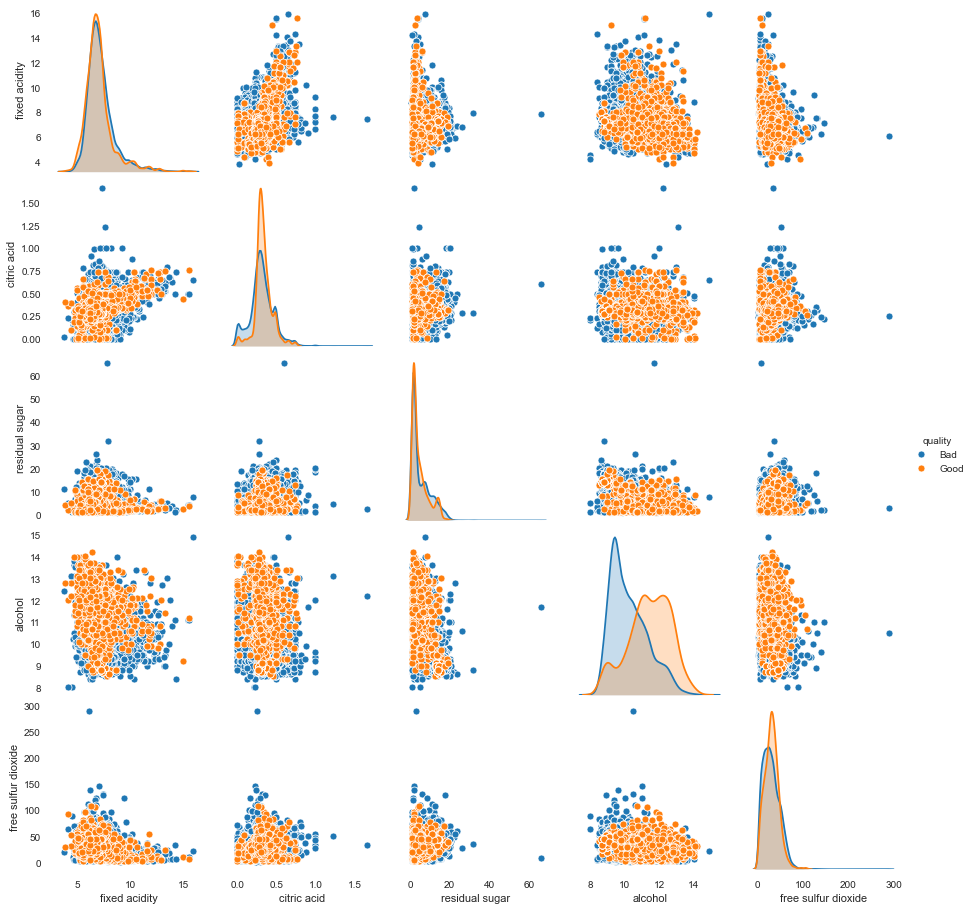

In [659]:
sns.pairplot(df_wine_trial[['fixed acidity','citric acid','residual sugar','alcohol','free sulfur dioxide','quality']],hue='quality')

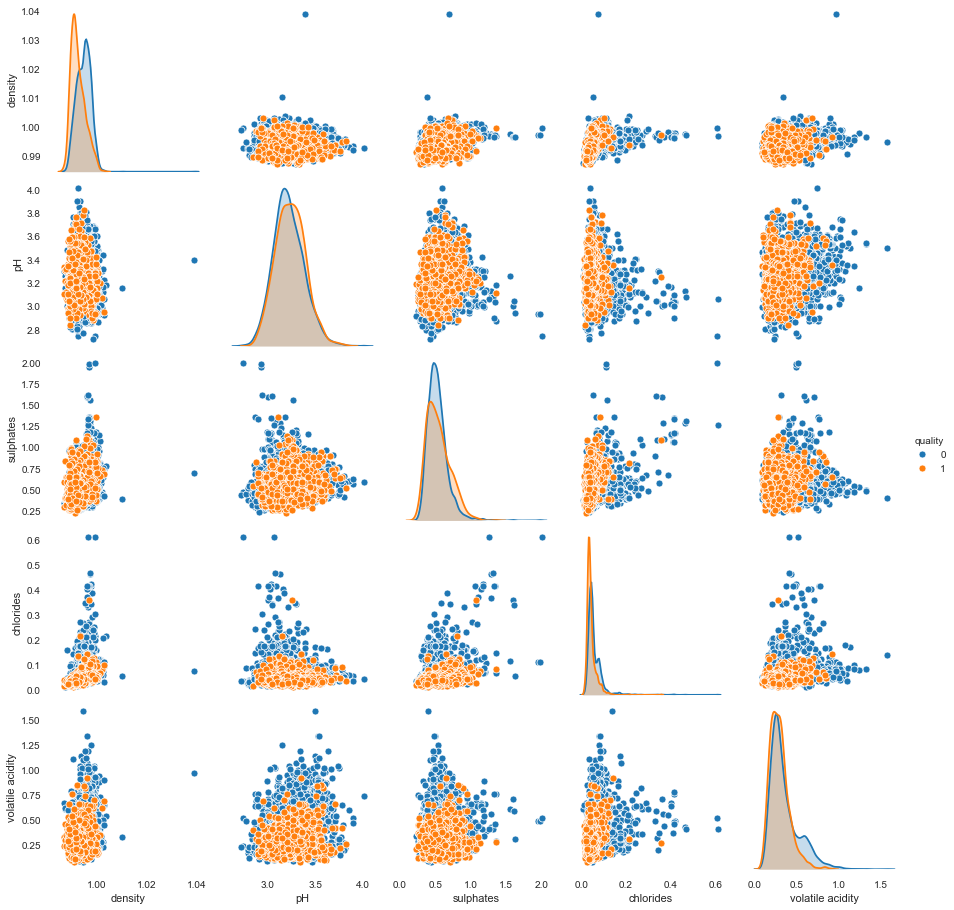

In [720]:
sns.pairplot(df_wine_trial[["density","pH","sulphates","chlorides","volatile acidity","quality"]],hue='quality')

#### Observations from Pair plot above :
1. We could see that the quality of wine is not strongly proptional to the alcohol content, meaning higher alcohol doesn't mean that the quality of wine is good.
2. However with higher "free sulful dioxide" and "citric acid", we see that the quality affects propotionally
3. Chlorides also plays an important role in determining the quality of wine, similarly the density

#### We are encoding the labels to categorize all "Bad" quality as 0 and all "Good quality" as 1

In [660]:
df_wine_trial['quality']=label_quality.fit_transform(df_wine_trial['quality'].astype(str))

In [661]:
df_wine_trial['quality']

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    1
6496    0
Name: quality, Length: 6497, dtype: int64

In [662]:
df_wine_trial['quality'].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

<a id=section5> </a>
### 5. Pandas Profiling

In [663]:
#df_wine_trial.profile_report(title='Pandas Profiling after Data profiling')

<a id=section6></a>
### 6. Inferences about quality prediction metrices

#### Inferences from the above Profiling report and some more supporting info:

- Dataset has 1179 duplicate rows in the dataset

Correlation between the fields :

1. __Total sulfur dioxide <--> Free sulfur dioxide are highly corelated (0.72)__
    - Total sulfur dioxide = Free SO2 + Other chemicals
        - Some useful info about SO2 in Wine :-
            In winemaking, the use of sulfur dioxide (SO2) is critical. We tend to talk a lot about free SO2 (FSO2) in particular, and not without good reason. The FSO2 and the pH of your wine determine how much SO2 is available in the active, molecular form to help __protect the wine from oxidation and spoilage__. FSO2 is also something we have to keep a close eye on, because it can be hard to predict how much will be lost, and at what rate, to binding or to aeration. Too much FSO2 can be perceptible to consumers, by masking the wine’s own fruity aromas
2. __Residual sugar <--> Density (0.55)__
    - Residual sugar as well plays a vital role in determining the quality of the wine. 
    - The sugar in wine is called “Residual Sugar” or RS.

        - That means the sugar in wine is what remains after grapes have gone through the winemaking process. Grapes contain fruit sugars (fructose and glucose) and the residual sugar is what’s left after yeast has chomped on those sugars.

    - Dry vs. Sweet Wine
        - During winemaking, yeast eats up sugar and makes ethanol (alcohol) as a by-product. When the yeast is able to eat up all the sugar the result is a dry wine – higher in alcohol content and low in sugar. When the yeast is is stopped by a winemaker (often by rapid chilling) sugar remains and alcohol is lower.
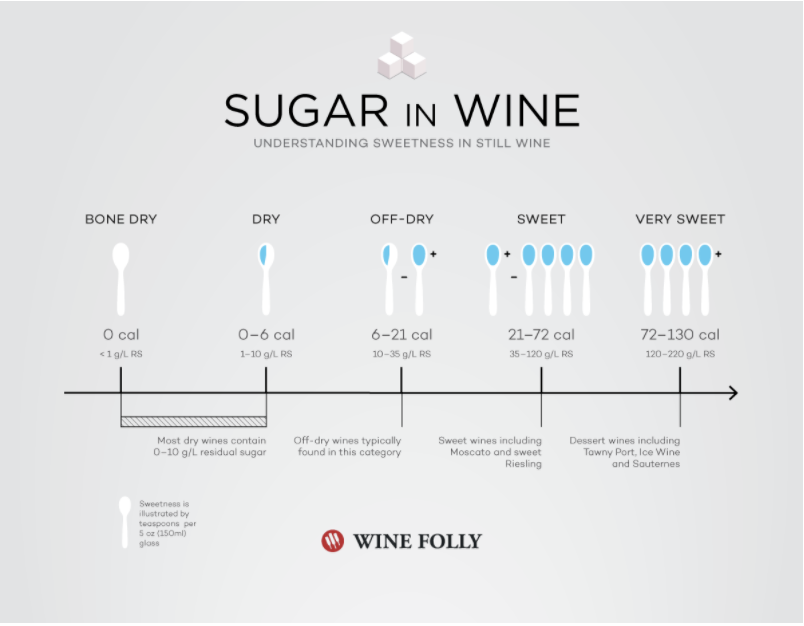
                (Source :- https://winefolly.com/deep-dive/sugar-in-wine-chart/)
3. Residual sugar <--> Total sulfur dioxide (0.5)
4. Density <--> Fixed acidity (0.45)
5. residual sugar <--> free sulfur dioxide (0.4)
6. Chlorides <--> density (0.36)
7. Sulphates <--> density (0.26)

__However when we check the target quality variable corelation :__

1. __Quality <--> alcohol level are highly corelated__
    - Vintners control fermentation by the amount of sugar in the must and fermenting temperature. Depending on the type of wine, vintners determine when grapes have ripened to the proper degree of ripeness for the desired sugar content before harvesting the grapes. Sugar may be needed for wild grapes, but European grapes seldom need added sugar. Wines continue to ferment until the sugar is converted into alcohol. Diluting the wine with water might be necessary for young, acidic grapes.

    - Winemakers never follow a strict formula but continue making adjustments throughout the fermentation process. Alcohol content affects aroma and taste in critical ways, and the sugar content of the grapes determines alcohol content. Vintners test wine regularly and add water, sugar or fruit juice to control alcohol level, taste and other characteristics.
(Source :- https://ayzanyc.com/blog/)
2. __Also seems like the quality of the wine doesn't rely upon the density__


<a id=section7></a>
### 7. Splitting the data fro Training and Testing 

#### Now let's divide the dataset into Train and Test dataset with accomodating 20% of dataset to testing

In [664]:
df_wine_trial=df_wine_trial.drop_duplicates()
df_wine_trial.shape

(5318, 12)

In [665]:
X=df_wine_trial.iloc[:,:-1].values
Y=df_wine_trial.iloc[:,-1].values

In [666]:
X.shape
Y.shape

(5318,)

In [667]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [668]:
df_wine_trial.iloc[0:1,:]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0

<a id=section8></a>
### 8. Normalizing the data to same scale

#### We may need to standardize the data as they are of different scale :

#### Let's use a Min-Max scaler to get all the values to range of 0-1

In [669]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train_scalar=scalar.fit_transform(X_train)
X_test_scalar=scalar.fit_transform(X_test)

##### Now that we have all the required data ready with pre-processed, Let's start with the set of models and see, which of the model has better accuracy

<a id=section9></a>
### 9. Logistic regression Model

In [670]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [671]:
lr.fit(X_train_scalar,Y_train)
Y_pred_train_lr=lr.predict(X_train_scalar)
Y_pred_test_lr=lr.predict(X_test_scalar)

In [672]:
Prob_lr = lr.predict_proba(X_train_scalar)

In [673]:
prob_1 = Prob_lr[:,1]
prob_0=Prob_lr[:,0]

<a id=section10></a>
### 10. Model evaluation
#### Lets do the Model evaluation for Logistic regression prediction

In [674]:
from sklearn.metrics import accuracy_score
accuracy_of_train_lr=accuracy_score(Y_train,Y_pred_train_lr)
accuracy_of_test_lr=accuracy_score(Y_test,Y_pred_test_lr)
print("Accuracy score of Logistic regression model on Training dataset is  ",accuracy_of_train_lr)
print("Accuracy score of Logistic regression model on Testing dataset is  ",accuracy_of_test_lr)

Accuracy score of Logistic regression model on Training dataset is   0.8272214386459803
Accuracy score of Logistic regression model on Testing dataset is   0.8101503759398496


In [675]:
from sklearn.metrics import confusion_matrix
c_matrix_for_train_ds=pd.DataFrame(confusion_matrix(Y_train,Y_pred_train_lr))
c_matrix_for_train_ds.index=['Actual Bad','Actual Good']
c_matrix_for_train_ds.columns=['Predicted Bad','Predicted Good']
print("Confusion Matrix for Training Dataset :")
c_matrix_for_train_ds

Confusion Matrix for Training Dataset :


Predicted Bad  Predicted Good
Actual Bad            3307             132
Actual Good            603             212

### This means that there are totally (3981+265)=4246 Correct predictions and (761+190)=951 Incorrect predictions

In [676]:
from sklearn.metrics import confusion_matrix
c_matrix_for_test_ds=pd.DataFrame(confusion_matrix(Y_test,Y_pred_test_lr))
c_matrix_for_test_ds.index=['Actual Bad','Actual Good']
c_matrix_for_test_ds.columns=['Predicted Bad','Predicted Good']
print("Confusion Matrix for Test Dataset")
c_matrix_for_test_ds

Confusion Matrix for Test Dataset


Predicted Bad  Predicted Good
Actual Bad             790              81
Actual Good            121              72

<a id=lr_class_report></a>
### LR Model Classification report

In [677]:
from sklearn.metrics import classification_report
class_report_lr_model=classification_report(Y_train,Y_pred_train_lr)
print("Classification report for Train dataset is \n", class_report_lr_model)

Classification report for Train dataset is 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      3439
           1       0.62      0.26      0.37       815

    accuracy                           0.83      4254
   macro avg       0.73      0.61      0.63      4254
weighted avg       0.80      0.83      0.80      4254



In [723]:
class_report_lr_model=classification_report(Y_test,Y_pred_test_lr)
print("Classification report for Test dataset is \n", class_report_lr_model)

Classification report for Test dataset is 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       871
           1       0.47      0.37      0.42       193

    accuracy                           0.81      1064
   macro avg       0.67      0.64      0.65      1064
weighted avg       0.80      0.81      0.80      1064



<a id=section11></a>
### 11. Decision Tree Model

In [679]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [680]:
dt.fit(X_train_scalar,Y_train)

DecisionTreeClassifier()

In [681]:
Y_pred_train_dt=dt.predict(X_train_scalar)
Y_pred_test_dt=dt.predict(X_test_scalar)

#### Model evaluation

In [682]:
from sklearn.metrics import accuracy_score
accuracy_of_train_dt=accuracy_score(Y_train,Y_pred_train_dt)
accuracy_of_test_dt=accuracy_score(Y_test,Y_pred_test_dt)
print("Accuracy score of Decision Tree model on Training dataset is  ",accuracy_of_train_dt)
print("Accuracy score of Decision Tree model on Testing dataset is  ",accuracy_of_test_dt)

Accuracy score of Decision Tree model on Training dataset is   1.0
Accuracy score of Decision Tree model on Testing dataset is   0.6466165413533834


In [683]:
from sklearn.metrics import confusion_matrix
c_matrix_for_train_ds_dt=pd.DataFrame(confusion_matrix(Y_train,Y_pred_train_dt))
c_matrix_for_train_ds_dt.index=['Actual Bad','Actual Good']
c_matrix_for_train_ds_dt.columns=['Predicted Bad','Predicted Good']
c_matrix_for_train_ds_dt

Predicted Bad  Predicted Good
Actual Bad            3439               0
Actual Good              0             815

In [684]:
X_train_scalar_df=pd.DataFrame(X_train_scalar)

In [685]:
#!pip install graphviz
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
export_graphviz(dt,'tree.dot',feature_names=X_train_scalar_df.columns)

dot -Tpng tree.dot -o tree.png

In [686]:
from IPython.display import Image
Image(filename="tree.png",retina=True)

#### As per the Model evaluation/Accuracy score, the model seems to have Low Bias and High Variance, which is a case of Overfit

##### Hence let's do the Hyperparameter tuning with GridSearchCV and see, if the overfit issue could be overcome

In [687]:
from sklearn.model_selection import GridSearchCV

tree_para = [{'criterion':['gini','entropy'],'max_depth':range(2,60),'max_features':['sqrt','log2',None]}]
grid_search_model=GridSearchCV(dt,tree_para)

In [688]:
grid_search_model.fit(X_train_scalar,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
                          'max_features': ['sqrt', 'log2', None]}])

In [689]:
grid_search_model.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2'}

In [690]:
new_dt_HP_model=DecisionTreeClassifier(criterion='entropy',max_depth=31,max_features='log2')
new_dt_HP_model.fit(X_train_scalar,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=31, max_features='log2')

In [691]:
Y_pred_train_dt_HP_tuned_model=new_dt_HP_model.predict(X_train_scalar)
Y_pred_test_dt_HP_tuned_model=new_dt_HP_model.predict(X_test_scalar)

In [692]:
from sklearn.metrics import accuracy_score
accuracy_of_train_dt_HP_tuned_model=accuracy_score(Y_train,Y_pred_train_dt_HP_tuned_model)
accuracy_of_test_dt_HP_tuned_model=accuracy_score(Y_test,Y_pred_test_dt_HP_tuned_model)
print("Accuracy score of Decision Tree model on Training dataset is  ",accuracy_of_train_dt_HP_tuned_model)
print("Accuracy score of Decision Tree model on Testing dataset is  ",accuracy_of_test_dt_HP_tuned_model)

Accuracy score of Decision Tree model on Training dataset is   1.0
Accuracy score of Decision Tree model on Testing dataset is   0.681390977443609


#### Finally, we are able to tune the Hyper params to give the best with max_depth of 5 and using "log2" as a max_feature.

<a id=section12></a>
### 12.DT Model Classification report 

#### Below is the classification report for Non HP tuned DT Model

In [693]:
from sklearn.metrics import classification_report
class_report_dt_train=classification_report(Y_train,Y_pred_train_dt)
print("Classification report for Train Dataset is \n",class_report_dt_train)

Classification report for Train Dataset is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3439
           1       1.00      1.00      1.00       815

    accuracy                           1.00      4254
   macro avg       1.00      1.00      1.00      4254
weighted avg       1.00      1.00      1.00      4254



In [694]:
class_report_dt_test=classification_report(Y_test,Y_pred_test_dt)
print("Classification report for Train Dataset is \n",class_report_dt_test)

Classification report for Train Dataset is 
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       871
           1       0.26      0.52      0.35       193

    accuracy                           0.65      1064
   macro avg       0.56      0.60      0.55      1064
weighted avg       0.75      0.65      0.68      1064



#### Below is the classification report of HP tuned Model

In [695]:
class_report_dt_train_tuned=classification_report(Y_train,Y_pred_train_dt_HP_tuned_model)
print("Classification report(Tuned DT Model) for Train Dataset is \n",class_report_dt_train_tuned)

Classification report(Tuned DT Model) for Train Dataset is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3439
           1       1.00      1.00      1.00       815

    accuracy                           1.00      4254
   macro avg       1.00      1.00      1.00      4254
weighted avg       1.00      1.00      1.00      4254



In [696]:
class_report_dt_test_tuned=classification_report(Y_test,Y_pred_test_dt_HP_tuned_model)
print("Classification report(Tuned DT Model) for Train Dataset is \n",class_report_dt_test_tuned)

Classification report(Tuned DT Model) for Train Dataset is 
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       871
           1       0.27      0.45      0.34       193

    accuracy                           0.68      1064
   macro avg       0.56      0.59      0.56      1064
weighted avg       0.75      0.68      0.71      1064



<a id=section13></a>
### 13. Random Forest model

In [697]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

In [698]:
rf.fit(X_train_scalar,Y_train)
Y_pred_train_rf=rf.predict(X_train_scalar)
Y_pred_test_rf=rf.predict(X_test_scalar)

In [699]:
from sklearn.metrics import accuracy_score
accuracy_of_train_rf=accuracy_score(Y_train,Y_pred_train_rf)
accuracy_of_test_rf=accuracy_score(Y_test,Y_pred_test_rf)
print("Accuracy score of Random Forest on Training dataset is",accuracy_of_train_rf)
print("Accuracy score of Random Forest on Test dataset is",accuracy_of_test_rf)

Accuracy score of Random Forest on Training dataset is 0.9997649271274095
Accuracy score of Random Forest on Test dataset is 0.8139097744360902


#### Since we could see that the case of Random Forest is also same as Decision Trees. We would next try to use RandomizedSearchCV to do the HyperParameter Tuning

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [700]:
from sklearn.model_selection import RandomizedSearchCV
param_dist ={"max_depth":range(2,15),
            "min_samples_split":range(2,10),
            "min_samples_leaf":range(1,10),
            "bootstrap":[True,False],
            "n_estimators":[10,500],
            "criterion":["gini","entropy"],
            "max_features":["sqrt","log2",5]
            }
n_iter_search=100
random_search_model=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=n_iter_search,n_jobs=-1)

In [701]:
random_search_model.fit(X_train_scalar,Y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 15),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [10, 500]})

In [702]:
random_search_model.best_params_

{'n_estimators': 500,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 14,
 'criterion': 'gini',
 'bootstrap': False}

In [703]:
random_search_model.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=14, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=500)

In [704]:
rf_new_HP_model=RandomForestClassifier(n_estimators=500,min_samples_split=4,min_samples_leaf=5,max_features=5,
                                       max_depth=12,criterion='entropy',bootstrap=False)
rf_new_HP_model.fit(X_train_scalar,Y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=12,
                       max_features=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=500)

In [705]:
Y_pred_train_rf_HP_tuned_model=rf_new_HP_model.predict(X_train_scalar)
Y_pred_test_rf_HP_tuned_model=rf_new_HP_model.predict(X_test_scalar)

In [706]:
accuracy_of_train_rf_HP_tuned_model=accuracy_score(Y_train,Y_pred_train_rf_HP_tuned_model)
accuracy_of_test_rf_HP_tuned_model=accuracy_score(Y_test,Y_pred_test_rf_HP_tuned_model)


In [707]:
print("Accuracy score of Random Forest model on Training dataset is  ",accuracy_of_train_rf_HP_tuned_model)
print("Accuracy score of Random Forest model on Testing dataset is  ",accuracy_of_test_rf_HP_tuned_model)

Accuracy score of Random Forest model on Training dataset is   0.9666196520921486
Accuracy score of Random Forest model on Testing dataset is   0.8233082706766918


In [718]:
from sklearn.metrics import confusion_matrix
conf_matrix_of_RF_Tuned_model=pd.DataFrame(confusion_matrix(Y_train,Y_pred_train_rf_HP_tuned_model))

conf_matrix_of_RF_Tuned_model.index=['Actual Bad','Actual Good']
conf_matrix_of_RF_Tuned_model.columns=['Predicted Bad','Predicted Good']
print("Confusion Matrix for Random Forest Model is  \n")
conf_matrix_of_RF_Tuned_model

Confusion Matrix for Random Forest Model is  



Predicted Bad  Predicted Good
Actual Bad            3430               9
Actual Good            133             682

In [719]:
conf_matrix_of_RF_Tuned_model=pd.DataFrame(confusion_matrix(Y_test,Y_pred_test_rf_HP_tuned_model))

conf_matrix_of_RF_Tuned_model.index=['Actual Bad','Actual Good']
conf_matrix_of_RF_Tuned_model.columns=['Predicted Bad','Predicted Good']
print("Confusion Matrix for Random Forest Model is (Test Dataset)  \n")
conf_matrix_of_RF_Tuned_model

Confusion Matrix for Random Forest Model is (Test Dataset)  



Predicted Bad  Predicted Good
Actual Bad             828              43
Actual Good            145              48

<a id="RF_Class_model"></a>
### RF Classification Model

In [708]:
from sklearn.metrics import classification_report
class_report = classification_report(Y_train,Y_pred_train_rf_HP_tuned_model)
print("Classification report for Train Dataset is : \n", class_report)
#pd.DataFrame(class_report)

Classification report for Train Dataset is : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3439
           1       0.99      0.84      0.91       815

    accuracy                           0.97      4254
   macro avg       0.97      0.92      0.94      4254
weighted avg       0.97      0.97      0.97      4254



In [709]:
class_report_test = classification_report(Y_test,Y_pred_test_rf_HP_tuned_model)
print("Classification report for Test Dataset is : \n", class_report_test)

Classification report for Test Dataset is : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       871
           1       0.53      0.25      0.34       193

    accuracy                           0.82      1064
   macro avg       0.69      0.60      0.62      1064
weighted avg       0.79      0.82      0.80      1064



### Conclusions:
- From all the above 3 models, Logistic regression has the best fit, because the accuracy score of both Test and Train dataset are in same ballpark figures of 80%
- However the Random Forest model als seems to be fairly good, however seems to have low bias for the Training Dataset(Accuracy score = 96.6% - In an Hyper Parameter Tuned model), but High variance in Test dataset(Accuracy score = 82.3%), which depicts the Overfit model, compared to Logistic regression model
- Decision Tree model is definitely an Overfit model

__Business Perspective__:

- Coming to the Business perspective, the False Positive is more improtant to handle compared to that of False Negative, because conisdering Positive here as Quality of wine is GOOD, but if you release a wine, whose actual quality is bad, but you are predicting it as Good, which is False Positive, then may have serious consequence on the Business.

- Taking the precision into account between the best 2 models, Randome Forest seems to be doing good job. Taking Business into prespective, we have picked the Random forest as an appropriate model for the Wine Quality prediction